## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 

<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

# Detección de sarcasmo
Para este ejercicio vas a utilizar el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos. Se pide:
1. Si hubiese missings, eliminalos


In [1]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data/train-balanced-sarcasm.csv')
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [5]:
df['label'].value_counts()

label
0    505413
1    505413
Name: count, dtype: int64

In [8]:
df['score'].unique()

array([   2,   -4,    3, ...,  -93, -172, 1015], dtype=int64)

In [9]:
df['ups'].unique()

array([  -1,    3,    0, ...,  -93, -172, 1015], dtype=int64)

In [10]:
df['downs'].unique()

array([-1,  0], dtype=int64)

In [ ]:
# eliminaremos algunas columnas que no aportan nada al objetivo del ejercicio



## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

1. Analice el conjunto de datos, haga algunos gráficos. Este [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) podría servir como ejemplo

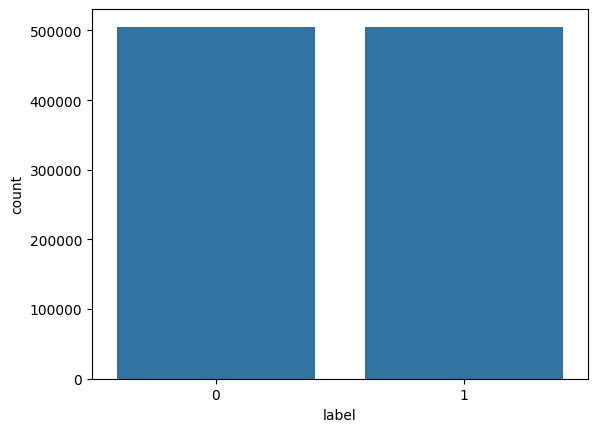

In [11]:
# Evidenciamos que la columna label (que describe si existe o no sarcasmo) esta balanceada en el train.
sns.countplot(x = 'label', data=df);

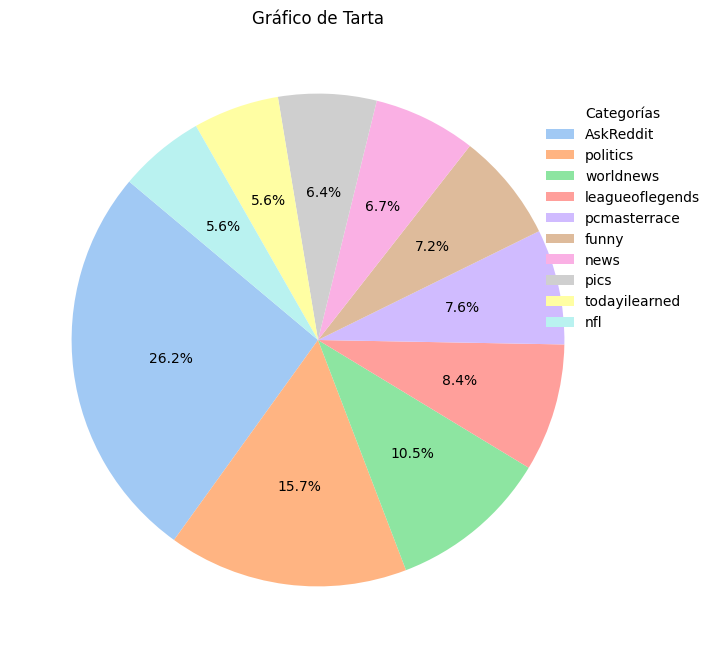

In [33]:
# toma los 10 subreddits mas representativos
top_subreddits = df['subreddit'].value_counts()[:10]
# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(top_subreddits, autopct = '%1.1f%%', startangle=140, colors = sns.color_palette('pastel'))
plt.legend(labels=top_subreddits.index, loc='upper left', bbox_to_anchor=(0.85, 0.9), title='Categorías', frameon=False)
plt.title('Gráfico de Tarta') # Titulo
plt.show() # Mostrar el gráfico

In [28]:
#!pip install wordcloud
from wordcloud import WordCloud

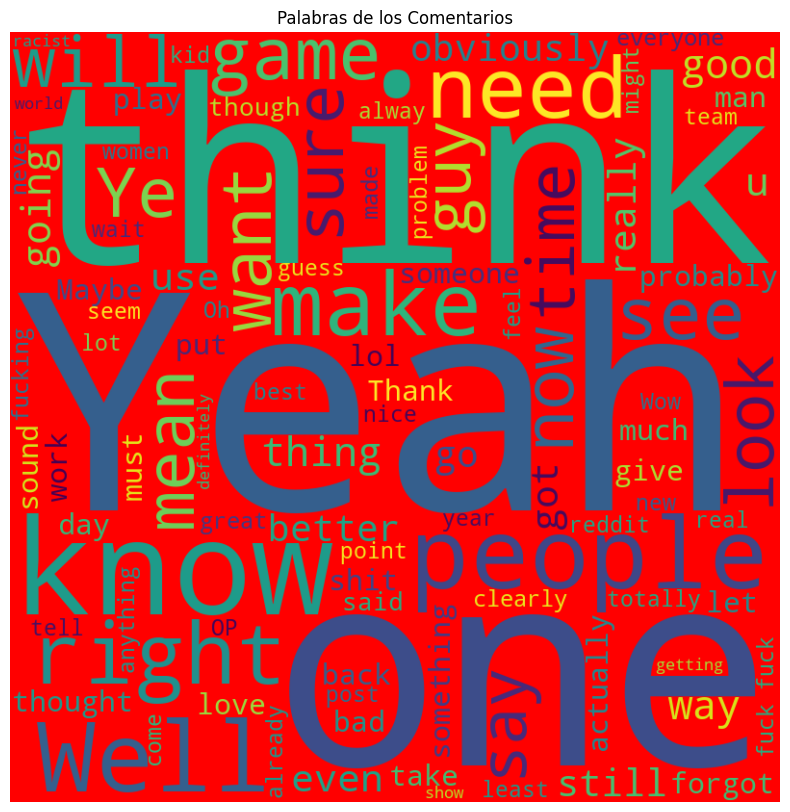

In [31]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=800,background_color='red',max_words=100).generate(' '.join(df['comment'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras de los Comentarios')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------

2. Cree un canal de regresión logística Tf-Idf + para predecir el sarcasmo (`label`) basándose en el texto de un comentario en Reddit (`comment`).

In [34]:
# Eliminamos los duplicados, referenciamos la columna 'commens' para esta acción

df.drop_duplicates(subset = 'comment', inplace=True)
df.shape 

(962294, 10)

In [35]:
# Filas iniciales menos las finales depues de realizar la eliminacion de duplicados
1010826 - 962294

48532

de 1,010,826 filas hemos realizado la eliminacion de 48,532 filas repetidas, quedanto un total de 962,294 filas.

In [37]:
df['comment'].head(10)

0                                           NC and NH.
1    You do know west teams play against west teams...
2    They were underdogs earlier today, but since G...
3    This meme isn't funny none of the "new york ni...
4                      I could use one of those tools.
5    I don't pay attention to her, but as long as s...
6        Trick or treating in general is just weird...
7                      Blade Mastery+Masamune or GTFO!
8    You don't have to, you have a good build, buy ...
9                    I would love to see him at lolla.
Name: comment, dtype: object

In [47]:
df.isna().sum()/len(df)*100

label             0.000000
comment           0.000104
author            0.000000
subreddit         0.000000
score             0.000000
ups               0.000000
downs             0.000000
date              0.000000
created_utc       0.000000
parent_comment    0.000000
dtype: float64

In [48]:
df = df.dropna()

In [49]:
df.isna().sum()/len(df)*100

label             0.0
comment           0.0
author            0.0
subreddit         0.0
score             0.0
ups               0.0
downs             0.0
date              0.0
created_utc       0.0
parent_comment    0.0
dtype: float64

In [50]:
# Por medio de Regex hacemos la limpieza de algunos de los signos de puntuacion y referencia que existen y son comunes en los comentario

import re

signos = re.compile("(\.)|(\+)|(\#)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_comment(comment): # Funcion copiada de Twitter
    return signos.sub('', comment.lower())

df['comment'] = df['comment'].apply(signs_comment)
df['comment'].head()

0                                            nc and nh
1    you do know west teams play against west teams...
2    they were underdogs earlier today but since gr...
3    this meme isn't funny none of the new york nig...
4                       i could use one of those tools
Name: comment, dtype: object

In [51]:
# Aplicamos la siguiente funcion para elimianr los links que puedan estar incluidos en los comentarios
def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

df['comment'] = df['comment'].apply(remove_links)

In [83]:
# Realizamos la division en train y test
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['label'], test_size=0.2, random_state=42)

In [64]:
from sklearn.model_selection import GridSearchCV

In [84]:
def train_model(X_TRAIN, y_TRAIN, X_TEST, y_TEST):
    lr = LogisticRegression()

    params = {
        'C': [0.01, 0.05, 0.25, 0.5, 1]
    }

    grid = GridSearchCV(lr, params, cv=5)
    grid.fit(X_TRAIN, y_TRAIN)

    # Obtener las predicciones del conjunto de prueba usando el mejor modelo
    predictions = grid.best_estimator_.predict(X_TEST)

    # Calcular y mostrar la precisión
    accuracy = accuracy_score(y_TEST, predictions)
    print(f"Final Accuracy: {accuracy}")

In [87]:
tfidf_vectorizer = TfidfVectorizer(binary=True,ngram_range=(1, 2))
tfidf_vectorizer.fit(X_train)
X_train_tranform = tfidf_vectorizer.transform(X_train)
X_test_transform = tfidf_vectorizer.transform(X_test)

In [86]:
#Sin aplicar N-Gram
#train_model(X_train_tranform, y_train, X_test_transform, y_test)

Final Accuracy: 0.6915291049002644


In [88]:
#Aplicando N-Gram
#train_model(X_train_tranform, y_train, X_test_transform, y_test)

Final Accuracy: 0.7205067053242509


-------------------------------------------------------------------------------------------------------------------------------------------

3. Traza las palabras/bigramas que predicen más el sarcasmo (puedes usar [eli5](https://github.com/TeamHG-Memex/eli5) para eso)

In [1]:
!pip install eli5

                                              0.0/216.2 kB ? eta -:--:--
     ------------------------------------- 216.2/216.2 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107759 sha256=7f996d1df93eee6cd6e3b830387009b03a614b14db6b36f5616501f1aa784d02
  Stored in directory: c:\users\sandia\appdata\local\pip\cache\wheels\ec\68\a9\de7d374ecb6f53462ce0eec8326fbab91b6228c82e67428d0d
Successfully built eli5



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
eli5.show_weights(model, vec=vectorizer, top=20, feature_names=vectorizer.get_feature_names_out())

-------------------------------------------------------------------------------------------------------------------------------------------

4. (opcionalmente) agregue subreddits como nuevas funciones para mejorar el rendimiento del modelo. Aplique aquí el enfoque de Bolsa de palabras, es decir, trate cada subreddit como una característica nueva.